In [1]:
import numpy as np

### Load Features, Names, and Labels

In [2]:
train_features_path =  "../feature/ICDAR-INCEPTION-feature/train_features_triplet_loss.npy"
train_names_path = "../feature/ICDAR-INCEPTION-feature/train_names.npy"
train_labels_path = "../feature/ICDAR-INCEPTION-feature/train_labels.npy"

test_features_path = "../feature/ICDAR-INCEPTION-feature/test_features_triplet_loss.npy"
test_names_path = "../feature/ICDAR-INCEPTION-feature/test_names.npy"
test_labels_path = "../feature/ICDAR-INCEPTION-feature/test_labels.npy"

validation_features_path = "../feature/ICDAR-INCEPTION-feature/validation_features_triplet_loss.npy"
validation_names_path = "../feature/ICDAR-INCEPTION-feature/validation_names.npy"
validation_labels_path = "../feature/ICDAR-INCEPTION-feature/validation_labels.npy"

In [3]:
train_features = np.load(train_features_path)
train_names = np.load(train_names_path)
train_labels = np.load(train_labels_path)

test_features = np.load(test_features_path)
test_names = np.load(test_names_path)
test_labels = np.load(test_labels_path)

validation_features = np.load(validation_features_path)
validation_names = np.load(validation_names_path)
validation_labels = np.load(validation_labels_path)

In [4]:
print("train_features shape : ", train_features.shape)
print("test_features shape : ", test_features.shape)
print("validation_features shape : ", validation_features.shape)

train_features shape :  (857, 2048)
test_features shape :  (401, 2048)
validation_features shape :  (391, 2048)


### Feature Gallery

In [5]:
# Feature Gallery dilakukan untuk setiap kelas / nama seperti "001", "002", "003", dst dengan cara mengambil data training positive dan mengambil mean / rata-rata dari data tersebut
def create_feature_gallery(train_features, train_names, train_labels):
    gallery_feature = []
    gallery_name = []

    unique_names = set(train_names.flatten())
    sorted_names = sorted(unique_names)

    for name in sorted_names:
        # print(name)
        # print(name)
        name_features = []

        for feature, feature_name, label in zip(train_features, train_names, train_labels):
            # print(feature, feature_name, label)
            if name in feature_name and label == 1:
                name_features.append(feature)

        if name_features:
            # print(name_features)
            average_feature = np.mean(name_features, axis=0)
            gallery_feature.append(average_feature)
            gallery_name.append(name)

    return gallery_feature, gallery_name

In [6]:
gallery_features, gallery_names = create_feature_gallery(train_features, train_names, train_labels)

In [7]:
gallery_feature_path = "../feature/ICDAR-INCEPTION-feature/gallery_features_triplet_loss.npy"
gallery_name_path = "../feature/ICDAR-INCEPTION-feature/gallery_names.npy"

In [8]:
np.save(gallery_feature_path, gallery_features)
np.save(gallery_name_path, gallery_names)

In [9]:
gallery_features = np.load(gallery_feature_path)
gallery_names = np.load(gallery_name_path)

In [10]:
gallery_features_array = np.array(gallery_features)
print("gallery features shape : ", gallery_features_array.shape)

gallery features shape :  (64, 2048)


### Euclidean Distance

In [11]:
def euclidean_distance(feature_vector1, feature_vector2):
    return np.sqrt(np.sum((feature_vector1 - feature_vector2)**2))

In [12]:
def find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names):
    euclidean_distances = []
    euclidean_names = []
    euclidean_actual_labels = []

    for gallery_feature, gallery_name in zip(gallery_features, gallery_names):
        curr_euclid_name = gallery_name
        curr_euclid_feature = []
        curr_euclid_label = []
        curr_euclid_dist = []
        for feature, name, label in zip(test_features, test_names, test_labels):
            if gallery_name in name:
                curr_euclid_feature.append(feature)
                curr_euclid_label.append(label)
        
        for feature in curr_euclid_feature:
            distance = euclidean_distance(feature, gallery_feature)
            curr_euclid_dist.append(distance)

        euclidean_distances.append(curr_euclid_dist)
        euclidean_names.append(curr_euclid_name)
        euclidean_actual_labels.append(curr_euclid_label)
        
    return euclidean_distances, euclidean_names, euclidean_actual_labels

In [13]:
test_euclidean_distances, test_euclidean_names, test_euclidean_actual_labels = find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names)
train_euclidean_distances, train_euclidean_names, train_euclidean_actual_labels = find_euclidean_distance(train_features, train_names, train_labels, gallery_features, gallery_names)
validation_euclidean_distances, validation_euclidean_names, validation_euclidean_actual_labels = find_euclidean_distance(validation_features, validation_names, validation_labels, gallery_features, gallery_names)

### Split Euclidean Distance to Positive and Negative for Future Use (If needed)

In [14]:
def split_euc_dist(euclidean_distances, euclidean_names, euclidean_actual_labels):
    positive_distance = []
    positive_name = []
    positive_label = []
    negative_distance = []
    negative_name = []
    negative_label = []

    for euclidean_distance, euclidean_name, euclidean_actual_label in zip(euclidean_distances, euclidean_names, euclidean_actual_labels):
        pos_dist = []
        neg_dist = []
        pos_lab = []
        neg_lab = []
        for distance, label in zip(euclidean_distance, euclidean_actual_label):
            if label == 0:
                neg_dist.append(distance)
                neg_lab.append(label)
            else:
                pos_dist.append(distance)
                pos_lab.append(label)

        positive_distance.append(pos_dist)
        positive_name.append(euclidean_name)
        positive_label.append(pos_lab)

        negative_distance.append(neg_dist)
        negative_name.append(euclidean_name)
        negative_label.append(neg_lab)
        # print(euclidean_distance, euclidean_name, euclidean_actual_label)

    return positive_distance, negative_label

In [15]:
train_positive_dist, train_negative_dist = split_euc_dist(train_euclidean_distances, train_names, train_euclidean_actual_labels)
test_positive_dist, test_negative_dist = split_euc_dist(test_euclidean_distances, test_names, test_euclidean_actual_labels)
validation_positive_dist, validation_negative_dist = split_euc_dist(validation_euclidean_distances, validation_names, validation_euclidean_actual_labels)

In [16]:
flat_train_positive_dist = [item for sublist in train_positive_dist for item in sublist]
flat_train_negative_dist = [item for sublist in train_negative_dist for item in sublist]
flat_test_positive_dist = [item for sublist in test_positive_dist for item in sublist]
flat_test_negative_dist = [item for sublist in test_negative_dist for item in sublist]
flat_validation_positive_dist = [item for sublist in validation_positive_dist for item in sublist]
flat_validation_negative_dist = [item for sublist in validation_negative_dist for item in sublist]

print(f'Train total : {len(flat_train_positive_dist) + len(flat_train_negative_dist)}')
print(f'  Train pos : {len(flat_train_positive_dist)}')
print(f'  Train neg : {len(flat_train_negative_dist)}')
print(f' Test total : {len(flat_test_positive_dist) + len(flat_test_negative_dist)}')
print(f'   Test pos : {len(flat_test_positive_dist)}')
print(f'   Test neg : {len(flat_test_negative_dist)}')
print(f'  Val total : {len(flat_validation_positive_dist) + len(flat_validation_negative_dist)}')
print(f'    Val pos : {len(flat_validation_positive_dist)}')
print(f'    Val neg : {len(flat_validation_negative_dist)}')

Train total : 857
  Train pos : 463
  Train neg : 394
 Test total : 401
   Test pos : 212
   Test neg : 189
  Val total : 391
    Val pos : 212
    Val neg : 179


### Normalize Euclidean Distance

In [17]:
# Flatten the lists of distances
flat_test_distances = [item for sublist in test_euclidean_distances for item in sublist]
flat_train_distances = [item for sublist in train_euclidean_distances for item in sublist]
flat_validation_distances = [item for sublist in validation_euclidean_distances for item in sublist]

In [18]:
print(flat_train_distances)

[5.8469415, 6.805116, 6.1485276, 5.5230975, 6.3342104, 4.690829, 4.624966, 6.347847, 5.6389933, 5.53525, 4.6340094, 4.5964184, 5.437809, 6.259359, 7.376913, 6.6630983, 10.135882, 7.8226657, 6.5195823, 7.1560955, 10.118493, 6.7315593, 6.359638, 6.8893476, 6.427044, 5.5540104, 6.1996636, 6.520653, 8.030157, 7.4075103, 5.7516336, 6.1731734, 7.4038496, 6.2569604, 6.514932, 9.138146, 5.977592, 7.990441, 6.343673, 6.54218, 5.6576214, 5.937276, 6.9972754, 8.250321, 7.0876513, 6.0015397, 10.141929, 5.6947308, 8.092426, 5.512037, 10.38839, 5.763654, 6.588933, 7.283087, 6.6699295, 12.100963, 8.059926, 5.6605496, 8.006743, 7.411653, 6.815901, 10.288577, 5.9634132, 5.91648, 8.033014, 6.633206, 8.147569, 7.7126665, 7.2804494, 7.381073, 6.662452, 9.020749, 8.521859, 8.659311, 6.602064, 6.93376, 7.659557, 7.0424995, 5.277618, 5.039469, 5.8701043, 5.581012, 5.479137, 6.9160376, 8.122785, 5.2328944, 6.0094805, 6.307109, 4.731818, 6.164121, 5.829007, 8.552082, 6.3428664, 7.0813804, 8.131168, 6.3174906, 

In [19]:
for name, distance, label in zip(test_names, flat_test_distances, test_labels):
    print(name, distance, label)

001 26.542402 1
001 9.782342 1
001 6.0309124 1
001 6.577546 1
001 6.3723216 1
001 5.7666583 0
001 6.1302085 0
002 8.346477 1
002 5.1110106 1
002 7.239569 1
002 7.889211 1
002 7.4968243 1
002 8.174303 0
002 8.336358 0
002 8.604156 0
003 6.0336313 1
003 5.43034 1
003 7.3363514 1
003 6.375063 1
003 8.651787 1
003 7.2535014 0
003 5.379825 0
003 7.3503966 0
004 7.4497995 1
004 9.112932 1
004 7.467179 1
004 7.089389 1
004 8.70456 1
004 9.838363 0
004 8.283073 0
004 7.2243524 0
006 6.699072 1
006 9.101906 1
006 5.958825 1
006 4.915061 1
006 5.571379 1
006 8.67082 0
006 6.7781014 0
006 9.437249 0
009 6.607831 1
009 6.826719 1
009 6.692228 1
009 6.718908 1
009 7.60672 1
009 9.444385 0
009 6.9526615 0
009 8.000705 0
012 6.97717 1
012 11.257651 1
012 6.515674 1
012 6.673229 1
012 8.334488 1
012 7.922111 0
012 9.176851 0
012 7.345653 0
013 8.338484 1
013 6.444194 1
013 8.260888 1
013 11.610344 0
013 7.52898 0
013 7.043994 0
014 7.478668 1
014 6.1542716 1
014 6.9133735 1
014 5.696189 1
014 5.352162

In [20]:
def get_min_max(euclidean_distances):
    min_distance = min(euclidean_distances)
    max_distance = max(euclidean_distances)

    return min_distance, max_distance

In [21]:
min_val, max_val = get_min_max(flat_train_distances)
print(f'min: {min_val}, max: {max_val}')
min_val, max_val = get_min_max(flat_validation_distances)
print(f'min: {min_val}, max: {max_val}')
min_val, max_val = get_min_max(flat_test_distances)
print(f'min: {min_val}, max: {max_val}')

min: 4.098851680755615, max: 52.86687088012695
min: 4.95812463760376, max: 34.62253952026367
min: 4.915060997009277, max: 36.35641860961914


In [22]:
def normalize_distance(euclidean_distances, min_val, max_val):
    all_distance = []

    for distance in euclidean_distances:
        normalized_distance = (distance - min_val) / (max_val - min_val)

        # in case test and train distances are beyond max of train
        if normalized_distance > 1:
            normalized_distance = 1
        elif normalized_distance < 0:
            normalized_distance = 0
        
        all_distance.append(normalized_distance)

    return all_distance

def reverse_normalized_distance(euclidean_distances, min_val, max_val):
    reverse_distance = []
    normalized_distances = normalize_distance(euclidean_distances, min_val, max_val)
    for distance in normalized_distances:
        distance = -distance
        reverse_distance.append(distance)

    return reverse_distance

In [23]:
# normalized_positive_distances = reverse_normalized_distance(positive_distance)
# normalized_negative_distances = reverse_normalized_distance(negative_distance)

In [24]:
normalized_test_euclidean_distance = reverse_normalized_distance(flat_test_distances, min_val, max_val)
normalized_train_euclidean_distance = reverse_normalized_distance(flat_train_distances, min_val, max_val)
normalized_validation_euclidean_distance = reverse_normalized_distance(flat_validation_distances, min_val, max_val)

In [25]:
print(normalized_test_euclidean_distance)

[-0.6878629, -0.15480505, -0.035489924, -0.052875742, -0.046348527, -0.02708526, -0.03864806, -0.109137006, -0.0062322235, -0.073931545, -0.09459357, -0.08211361, -0.103660986, -0.108815186, -0.11733255, -0.035576403, -0.016388569, -0.07700973, -0.046435717, -0.118847474, -0.07437467, -0.014781936, -0.077456445, -0.08061798, -0.13351431, -0.08117073, -0.06915503, -0.12052595, -0.15658681, -0.107120454, -0.07344757, -0.0567409, -0.13316362, -0.033197172, -0.0, -0.02087436, -0.119452834, -0.059254456, -0.1438293, -0.05383896, -0.060800742, -0.056523222, -0.057371788, -0.08560887, -0.14405625, -0.06480638, -0.09813965, -0.06558588, -0.20172763, -0.05090789, -0.05591897, -0.10875571, -0.09563996, -0.13554728, -0.07730557, -0.10888279, -0.048634443, -0.10641485, -0.2129451, -0.08313632, -0.067711234, -0.08153615, -0.039413396, -0.06355681, -0.024843965, -0.0139021, -0.10495412, -0.05225341, -0.049232874, -0.072225384, -0.3177986, -0.33045176, -0.40861425, -0.32035816, -0.31581196, -0.327955

In [26]:
for name, distance, label in zip(test_names, normalized_test_euclidean_distance, test_labels):
    print(name, distance, label)

001 -0.6878629 1
001 -0.15480505 1
001 -0.035489924 1
001 -0.052875742 1
001 -0.046348527 1
001 -0.02708526 0
001 -0.03864806 0
002 -0.109137006 1
002 -0.0062322235 1
002 -0.073931545 1
002 -0.09459357 1
002 -0.08211361 1
002 -0.103660986 0
002 -0.108815186 0
002 -0.11733255 0
003 -0.035576403 1
003 -0.016388569 1
003 -0.07700973 1
003 -0.046435717 1
003 -0.118847474 1
003 -0.07437467 0
003 -0.014781936 0
003 -0.077456445 0
004 -0.08061798 1
004 -0.13351431 1
004 -0.08117073 1
004 -0.06915503 1
004 -0.12052595 1
004 -0.15658681 0
004 -0.107120454 0
004 -0.07344757 0
006 -0.0567409 1
006 -0.13316362 1
006 -0.033197172 1
006 -0.0 1
006 -0.02087436 1
006 -0.119452834 0
006 -0.059254456 0
006 -0.1438293 0
009 -0.05383896 1
009 -0.060800742 1
009 -0.056523222 1
009 -0.057371788 1
009 -0.08560887 1
009 -0.14405625 0
009 -0.06480638 0
009 -0.09813965 0
012 -0.06558588 1
012 -0.20172763 1
012 -0.05090789 1
012 -0.05591897 1
012 -0.10875571 1
012 -0.09563996 0
012 -0.13554728 0
012 -0.07730557 

# 3. ROC Curve

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

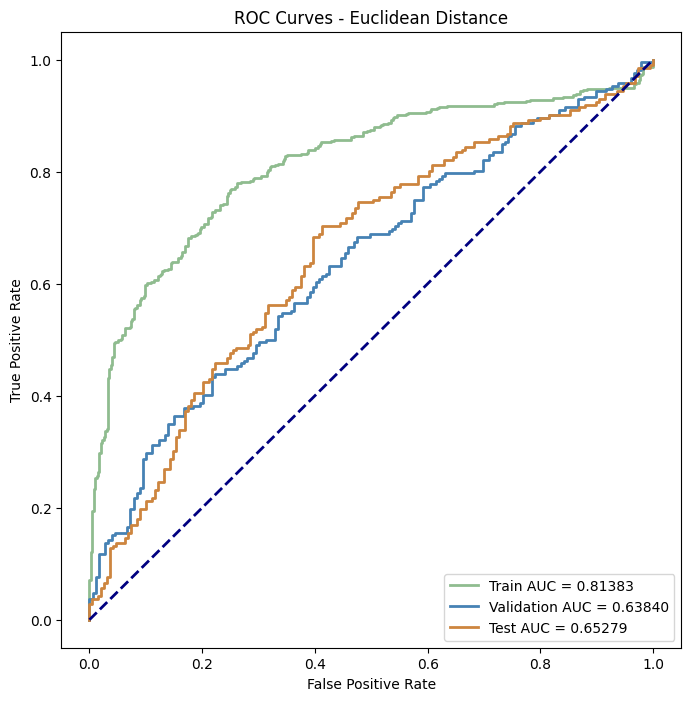

In [28]:
# Flatten the lists of labels
flat_test_labels = [item for sublist in test_euclidean_actual_labels for item in sublist]
flat_train_labels = [item for sublist in train_euclidean_actual_labels for item in sublist]
flat_validation_labels = [item for sublist in validation_euclidean_actual_labels for item in sublist]

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(flat_test_labels, normalized_test_euclidean_distance, drop_intermediate=False)
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, thresholds_train = roc_curve(flat_train_labels, normalized_train_euclidean_distance, drop_intermediate=False)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_validation, tpr_validation, thresholds_validation = roc_curve(flat_validation_labels, normalized_validation_euclidean_distance, drop_intermediate=False)
roc_auc_validation = auc(fpr_validation, tpr_validation)

# Plot ROC curve
plt.figure(figsize=(8, 8))

plt.plot(fpr_train, tpr_train, color='darkseagreen', lw=2, label=f'Train AUC = {roc_auc_train:.5f}')
plt.plot(fpr_validation, tpr_validation, color='steelblue', lw=2, label=f'Validation AUC = {roc_auc_validation:.5f}')
plt.plot(fpr_test, tpr_test, color='peru', lw=2, label=f'Test AUC = {roc_auc_test:.5f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Euclidean Distance')
plt.legend(loc='lower right')
plt.show()

In [29]:
print(tpr_test)

[0.         0.00471698 0.00943396 0.01415094 0.01886792 0.02358491
 0.02830189 0.02830189 0.03301887 0.03773585 0.03773585 0.03773585
 0.04245283 0.04245283 0.04716981 0.05188679 0.05660377 0.05660377
 0.06132075 0.06603774 0.06603774 0.07075472 0.0754717  0.0754717
 0.08018868 0.08490566 0.08962264 0.09433962 0.0990566  0.10377358
 0.10849057 0.11320755 0.11792453 0.12264151 0.12735849 0.12735849
 0.13207547 0.13207547 0.13679245 0.13679245 0.13679245 0.13679245
 0.14150943 0.14622642 0.14622642 0.1509434  0.15566038 0.15566038
 0.16037736 0.16509434 0.16981132 0.16981132 0.16981132 0.1745283
 0.17924528 0.17924528 0.18396226 0.18867925 0.19339623 0.19811321
 0.19811321 0.19811321 0.20283019 0.20754717 0.21226415 0.21226415
 0.21226415 0.21698113 0.21698113 0.22169811 0.22641509 0.23113208
 0.23113208 0.23584906 0.24056604 0.24528302 0.24528302 0.24528302
 0.25       0.25471698 0.25943396 0.26415094 0.26886792 0.26886792
 0.26886792 0.27358491 0.27830189 0.28301887 0.28773585 0.287735

In [30]:
print(fpr_test)

[0.         0.         0.         0.         0.         0.
 0.         0.00529101 0.00529101 0.00529101 0.01058201 0.01587302
 0.01587302 0.02116402 0.02116402 0.02116402 0.02116402 0.02645503
 0.02645503 0.02645503 0.03174603 0.03174603 0.03174603 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704
 0.03703704 0.03703704 0.03703704 0.03703704 0.03703704 0.04232804
 0.04232804 0.04761905 0.04761905 0.05291005 0.05820106 0.06349206
 0.06349206 0.06349206 0.06878307 0.06878307 0.06878307 0.07407407
 0.07407407 0.07407407 0.07407407 0.07936508 0.08465608 0.08465608
 0.08465608 0.08994709 0.08994709 0.08994709 0.08994709 0.08994709
 0.0952381  0.1005291  0.1005291  0.1005291  0.1005291  0.10582011
 0.11111111 0.11111111 0.11640212 0.11640212 0.11640212 0.11640212
 0.12169312 0.12169312 0.12169312 0.12169312 0.12698413 0.13227513
 0.13227513 0.13227513 0.13227513 0.13227513 0.13227513 0.13756614
 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14814815
 0.

In [31]:
def find_tpr_at_fpr(fpr, tpr, target_fpr):
    return np.interp(target_fpr, fpr, tpr)

In [32]:
target_fprs = [0.1, 0.01, 0.001]
tpr_at_target_fpr_train = [find_tpr_at_fpr(fpr_train, tpr_train, fpr) for fpr in target_fprs]
tpr_at_target_fpr_test = [find_tpr_at_fpr(fpr_test, tpr_test, fpr) for fpr in target_fprs]
tpr_at_target_fpr_val = [find_tpr_at_fpr(fpr_validation, tpr_validation, fpr) for fpr in target_fprs]

In [33]:
print("Train")
for tpr, fpr in zip(tpr_at_target_fpr_train, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_train}')

print("Validation")
for tpr, fpr in zip(tpr_at_target_fpr_val, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_validation}')

print("Test")
for tpr, fpr in zip(tpr_at_target_fpr_test, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_test}')


Train
TPR at FPR 0.100: 0.598
TPR at FPR 0.010: 0.233
TPR at FPR 0.001: 0.071
             AUC: 0.8138272796044336
Validation
TPR at FPR 0.100: 0.288
TPR at FPR 0.010: 0.047
TPR at FPR 0.001: 0.038
             AUC: 0.6383999156740804
Test
TPR at FPR 0.100: 0.198
TPR at FPR 0.010: 0.038
TPR at FPR 0.001: 0.028
             AUC: 0.6527902565638415
